In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb

## **Q.1)**

In [ ]:
def fun1(theta):  # function L(theta)
  return theta*theta

Text(0, 0, 'Minimum')

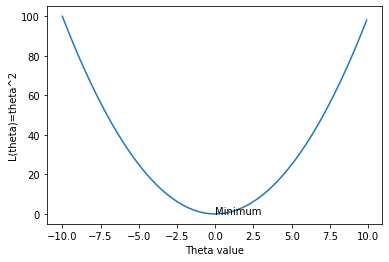

In [ ]:
theta = np.arange(-10,10,0.1)  # theta varying from -10 to 10
plt.plot(theta,fun1(theta))
plt.xlabel('Theta value')
plt.ylabel('L(theta)=theta^2')
plt.annotate("Minimum", (0,fun1(0)))  # minimum value

## **Q.2)**

In [ ]:
def function(theta1,theta2):  # function L(theta)
  return (theta1*theta1)+(theta2*theta2)

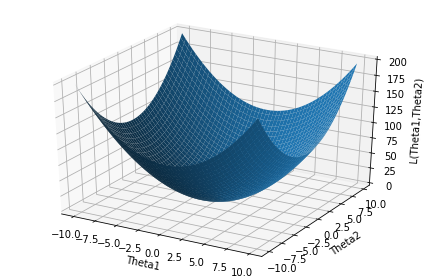

In [ ]:
t1 = np.arange(-10,10,0.1)   # Varying theta1 from -10 to 10
t2 = np.arange(-10,10,0.1)   # Varying theta2 from -10 to 10
L = np.zeros((len(t1),len(t2)))
x,y=np.meshgrid(t1,t2,sparse=False,indexing='xy')

min_cost = math.inf
min_t1=math.inf
min_t2=math.inf
for i in range(len(t1)):
  for j in range(len(t2)):
    L[i][j]=function(t1[i],t2[j])
    if L[i][j]<min_cost:    # finding minimum value of L(theta) and its corresponding theta1 and theta2 values
      min_cost=L[i][j]
      min_t1=t1[i]
      min_t2=t2[j]
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d') # Plotting the 3D graph
ax.plot_surface(x,y,L)
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('L(Theta1,Theta2)')
fig.tight_layout()

In [ ]:
print('Minimum Value',min_cost)
print('at theta0:',min_t1)
print('at theta1:',min_t2)

Minimum Value 2.5243548967072378e-27
at theta0: -3.552713678800501e-14
at theta1: -3.552713678800501e-14


## **Q.3)**

 **3-a)**

In [ ]:
def cost_fun(x,y,theta0,theta1): # Function to return value of L(theta)
  cost1 = 0.0
  for i in range(len(x)):
    temp = (y[i]-(theta0+(theta1*x[i])))**2
    cost1+=temp
  return cost1

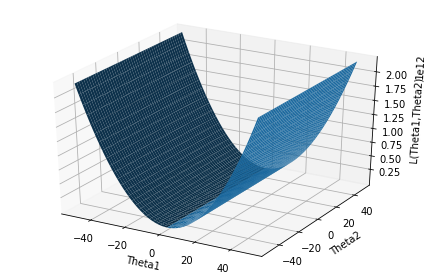

In [ ]:
#'data_1.xlsx' is the data-file provided

data = pd.read_excel('data_1.xlsx')   
theta1 = np.arange(-50,50,0.1)   # Varying theta1 from -50 to 50
theta2 = np.arange(-50,50,0.1)   # Varying theta2 from -50 to 50 
min_cost = math.inf
min_t1=math.inf
min_t2=math.inf
X=np.array(data['x'])
Y=np.array(data['y'])
L2=np.zeros((len(theta1),len(theta2)))
for i in range(len(theta1)):
  for j in range(len(theta2)):
    cost = cost_fun(X,Y,theta1[i],theta2[j])
    if cost<min_cost:    # finding minimum value of L(theta) and its corresponding theta1 and theta2 values
      min_cost=cost
      min_t1=theta1[i]
      min_t2=theta2[j]
    L2[i][j]=cost
fig=plt.figure()
ax = fig.add_subplot(111, projection='3d')   # Plotting the 3D graph (x,y,z) = (theta1, theta2, L(theta))
x,y=np.meshgrid(theta1,theta2,sparse=False,indexing='xy')

ax.plot_surface(x,y,L2)
ax.set_xlabel('Theta1')
ax.set_ylabel('Theta2')
ax.set_zlabel('L(Theta1,Theta2)')
fig.tight_layout()

In [ ]:
print('Minimum value of cost function = ',min_cost)
print('at theta0 = ',min_t1)
print('at theta1 = ',min_t2)

Minimum value of cost function =  6005.31000072428
at theta0 =  23.70000000000104
at theta1 =  7.105427357601002e-13


**3-b)**

In [ ]:
# [X]*[theta]=[Y]
# [theta] = ([X]^-1)*[Y]
# normal-equation [theta] = ([X]^T*[X])^-1*([X]^T)*[Y]

data = pd.read_excel('data_1.xlsx')  # Importing data file
x1 = np.array(data['x'])
x = np.ones((len(x1),2))
for i in range(len(x1)):
  x[i][1]=x1[i]

temp = np.linalg.pinv(np.matmul(x.T,x))       # Finding pseudo-inverse of X which is (X^T*X)^-1
t2 = np.matmul(temp,x.T)                      # t2 = (pseudo-inverse of x)*(x^T)
y = data['y']
theta = np.reshape(np.matmul(t2,y),(2,1))     # Finding theta vector using LS method
print('Theta vector obtained:')
print(theta)

Theta vector obtained:
[[ 4.92376299e+01]
 [-8.61193478e-03]]


## **Q.4)**

In [ ]:
x = data['x']
y = data['y']
cost = cost_fun(x,y,theta[0][0],theta[1][0])  # Obtaining L(theta) using LS method's theta1 and theta2
print('Value of cost function obtained at Theta vector obtained by LS method: ',cost)
cost = cost_fun(x,y,min_t1,min_t2)            # Obtaining L(theta) using some other theta1 and theta2
print('Value of cost function obtained at some other theta vector: ',cost)

Value of cost function obtained at Theta vector obtained by LS method:  1572.6503668922921
Value of cost function obtained at some other theta vector:  6005.31000072428


* It seems that theta vector otained by Lease-Square method gives 
the optimal value of parameters in-order to reduce the error  (cost-function value)

Text(0, 0.5, 'Y value')

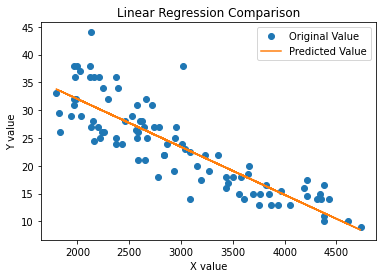

In [ ]:
y_predicted = theta[0][0] + theta[1][0]*x  # (Y)= (X)*(theta)
plt.plot(x,y,'o')    # Input data
plt.plot(x,y_predicted) # Predicted data
plt.legend(['Original Value','Predicted Value'])
plt.title('Linear Regression Comparison')
plt.xlabel('X value')
plt.ylabel('Y value')

## **Q.5)**

**a)Using scikit-learn**

In [ ]:
x = data['x']
y = data['y']
lin_reg = LinearRegression()  # Using scikit-learn's function to evaluate theta vector
x = np.array(x).reshape(-1,1)
lin_reg.fit(x,y) # Linear regression
print('Intercept obtained:',lin_reg.intercept_)
print('Feature coefficient:', lin_reg.coef_)

Intercept obtained: 49.23762989433491
Feature coefficient: [-0.00861193]


**b)**

In [ ]:
# using normal-equation

# appended column vector of 1 in X
x = [[1,1,2],[1,2,4],[1,3,6],[1,4,8]]
x = np.array(x).reshape(4,3)
y = [2,3,4,5]
y = np.array(y).reshape(-1,1)

# X^T*X is not invertible because its determinant is 0
# we are taking pseudo-inverse
temp = np.linalg.pinv(np.matmul(x.T,x))       #(X^T*X)^-1

t2 = np.matmul(temp,x.T)
theta = np.matmul(t2,y)
print('Theta vector obtained:')
print(theta)

Theta vector obtained:
[[1. ]
 [0.2]
 [0.4]]


In [ ]:
#using scikit-learn

x = [[1,2],[2,4],[3,6],[4,8]]
x = np.array(x).reshape(4,2)
y = [2,3,4,5]
y = np.array(y).reshape(-1,1)
lin_reg = LinearRegression()  # Using scikit-learn's function to evaluate theta vector
lin_reg.fit(x,y)
print('Intercept obtained:',lin_reg.intercept_)
print('Feature coefficient:', lin_reg.coef_)

Intercept obtained: [1.]
Feature coefficient: [[0.2 0.4]]


## **Q.6)**

**a)**

In [ ]:
#function which use scikit-learn LinearRegression to fit the model and returns the Intercept and Feature-Coefficients

def lin_regression(X,Y):
  lin_reg = LinearRegression()
  lin_reg.fit(X,Y)
  return lin_reg.intercept_,lin_reg.coef_

In [ ]:
#data_2.xlsx file containes the data of real-estate

training_data = pd.read_excel('data_2.xlsx', nrows = 276)   #using first 2/3 rows to train the model
x = np.zeros((len(training_data),6))  # Creating input X array
for i in range(6):
  x[:,i] = training_data.iloc[:,i+1]  # Filling the X array
y = training_data.iloc[:,7] # Creating output Y array
intercept, coeff = lin_regression(x,y) # Finding the intercept and feature coeficient using linear regression
print('Intercept obtained:',intercept)
print('Feature Coefficients:',coeff)

Intercept obtained: -13548.720510393558
Feature Coefficients: [ 4.73581437e+00 -3.15709169e-01 -4.20392980e-03  1.13399998e+00
  2.62121448e+02 -2.04579375e+01]


In [ ]:
#measuring RMS error for the test-data(Remaining 1/3 rows)

test_data = pd.read_excel('data_2.xlsx', skiprows = 276)   #using remaining 1/3 rows to test the model
x = np.zeros((len(test_data),6))
for i in range(6):
  x[:,i] = test_data.iloc[:,i+1]
actual_y = test_data.iloc[:,7]

y_predicted = coeff[0]*x[:,0]
for i in range(1,6,1):
  y_predicted = y_predicted+(coeff[i]*x[:,i]) # finding predicted value of output for given data
y_predicted = intercept + y_predicted

rms = mean_squared_error(actual_y, y_predicted, squared=False)  #calulating root-mean-squared error using scikit-learn's function
print('RMS-error value for test dataset',rms)

RMS-error value for test dataset 8.11487136254395


**c)**

In [ ]:
#re-learning the model by standardizing the training_set data

data = pd.read_excel('data_2.xlsx') #importing the data
x = np.zeros((len(data),6))
for i in range(6):
  x[:,i] = data.iloc[:,i+1] 
y = data.iloc[:,7]
# define min max scaler
scaler = MinMaxScaler() # scaling the data X in the range 0 to 1
# transform data
scaled_data = scaler.fit_transform(x)
intercept,coeff = lin_regression(scaled_data,y) # finding the interceppt and feature coefficients
print('Intercept obtained:',intercept)
print('Feature Coefficients:',coeff)

Intercept obtained: 32.803115184765915
Feature Coefficients: [  4.7199321  -11.81271697 -29.01011708  11.33324981  18.60579622
  -1.15267113]


Intercept obtained: -13548.720510393558
Feature Coefficients: [ 4.73581437e+00 -3.15709169e-01 -4.20392980e-03  1.13399998e+00
  2.62121448e+02 -2.04579375e+01]

**d)**

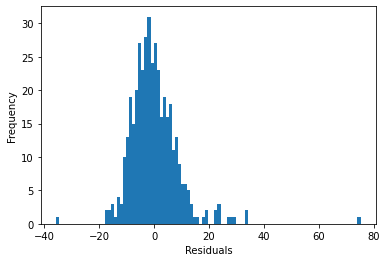

In [ ]:
#plotting residuals = y_actual-y_predicted

actual_y = data.iloc[:,7]

y_predicted = coeff[0]*scaled_data[:,0]   
for i in range(1,6,1):
  y_predicted = y_predicted+(coeff[i]*scaled_data[:,i])
y_predicted = intercept + y_predicted

plt.hist(actual_y-y_predicted,bins = 100)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**e)**

In [ ]:
data = pd.read_excel('data_2.xlsx',nrows = 276,index_col = 0)   #taking only training_data (276 rows) 
data.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,-0.000002,0.046932,-0.006557,0.035705,-0.033180,0.083707
X2 house age,-0.000002,1.000000,0.039149,0.050121,0.013510,-0.058051,-0.251667
X3 distance to the nearest MRT station,0.046932,0.039149,1.000000,-0.613160,-0.616806,-0.839856,-0.662035
X4 number of convenience stores,-0.006557,0.050121,-0.613160,1.000000,0.466367,0.468205,0.557992
X5 latitude,0.035705,0.013510,-0.616806,0.466367,1.000000,0.464370,0.571088
X6 longitude,-0.033180,-0.058051,-0.839856,0.468205,0.464370,1.000000,0.532773
Y house price of unit area,0.083707,-0.251667,-0.662035,0.557992,0.571088,0.532773,1.000000


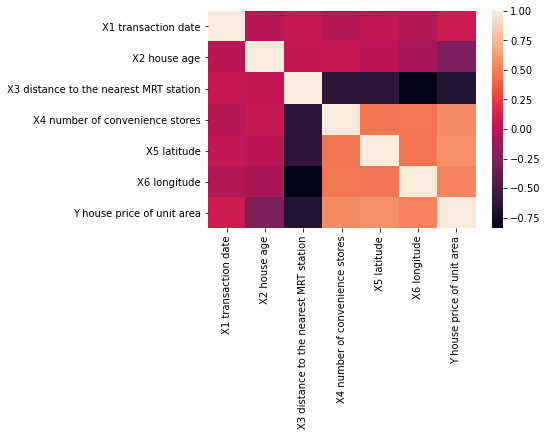

In [ ]:
sb.heatmap(data.corr())
plt.show()

In [ ]:
#since the correlation matrix is symmetric, taking only upper-triangular part of it
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]      #setting the threshold to be 0.8 for correlation in-order to drop the features
to_drop

['X6 longitude']

In [ ]:
#dropping the feature
data = data.drop('X6 longitude', axis=1)

In [ ]:
x = np.zeros((len(training_data),5))     #using first 2/3 rows to train the model
for i in range(5):
  x[:,i] = data.iloc[:,i]
y = data.iloc[:,5]                      
intercept,coeff = lin_regression(x,y)
print('Intercept obtained:',intercept)
print('Feature Coefficients:',coeff)

Intercept obtained: -16056.088443698818
Feature Coefficients: [ 4.72140890e+00 -3.15209962e-01 -3.97609963e-03  1.14079300e+00
  2.64114251e+02]


In [ ]:
#testing on optimal set of features

test_data = pd.read_excel('data_2.xlsx', skiprows = 276)   #using 1/3 rows to test the model
x = np.zeros((len(test_data),5))
for i in range(5):
  x[:,i] = test_data.iloc[:,i+1]
actual_y = test_data.iloc[:,7]

y_predicted = coeff[0]*x[:,0]
for i in range(1,5,1):
  y_predicted = y_predicted+(coeff[i]*x[:,i])
y_predicted = intercept + y_predicted

rms = mean_squared_error(actual_y, y_predicted, squared=False)  #calulating root-mean-squared error using scikit-learn's function
print('RMS-error value for test dataset',rms)

RMS-error value for test dataset 8.112225501798347


By reducing one feature, the rms-error value obtained for test-dataset is less than the formal value